In [240]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import sys

In [241]:
features = ['id','cycle','setting1','setting2','setting3','s1','s2', 
            's3', 's4','s5', 's6',  's7', 's8', 's9','s10', 
            's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21']
datatrain = pd.read_csv('data/train.csv')
datatest = pd.read_csv('data/test.csv')
RUL = datatest['ttf']

In [242]:
datatrain[features].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [243]:
datatest[features].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117


In [244]:

datatrain[features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s5,20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [245]:
datatrain[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [246]:
col_names = ['id','cycle','setting1','setting2','s2', 's3', 's4', 's6',  's7', 's8', 's9',
            's11', 's12', 's13', 's14', 's15',  's17',   's20', 's21']
data_train = datatrain[col_names]
data_test = datatest[col_names]

data_train.columns = col_names
data_test.columns = col_names

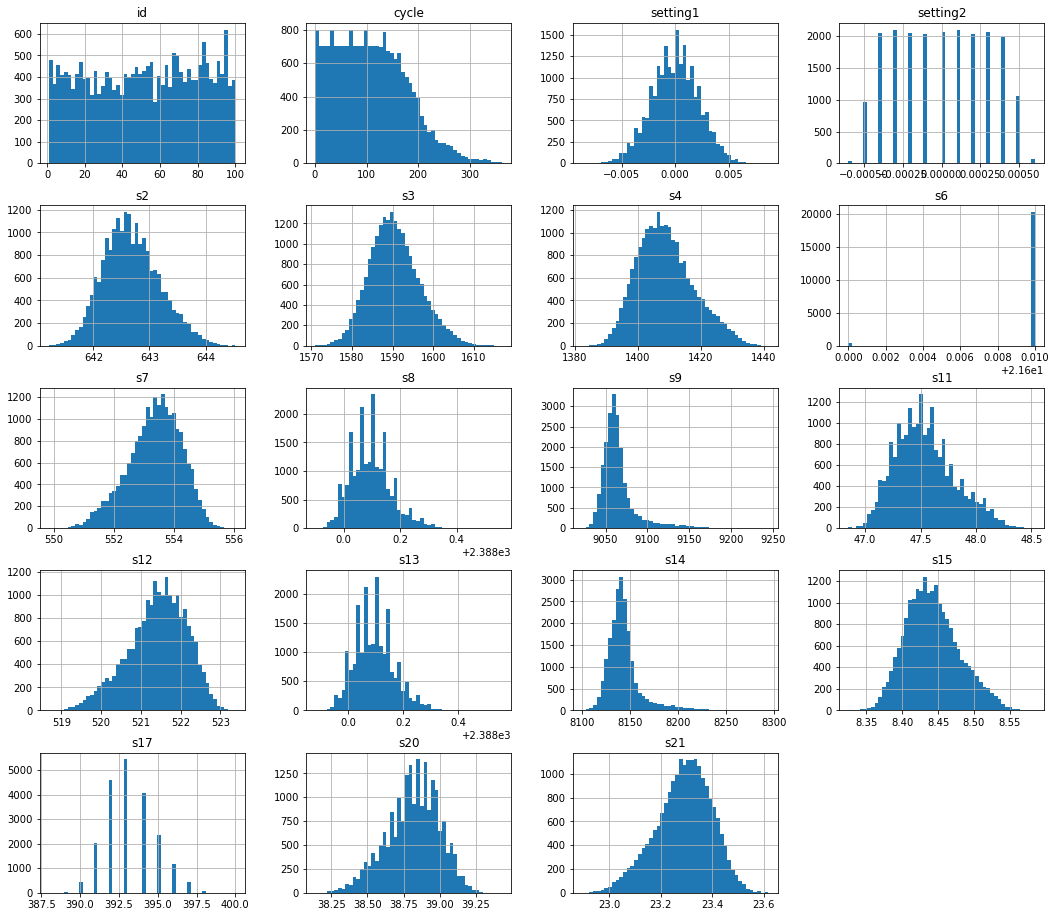

In [247]:
data_train.hist(bins=50, figsize=(18,16))
plt.show()

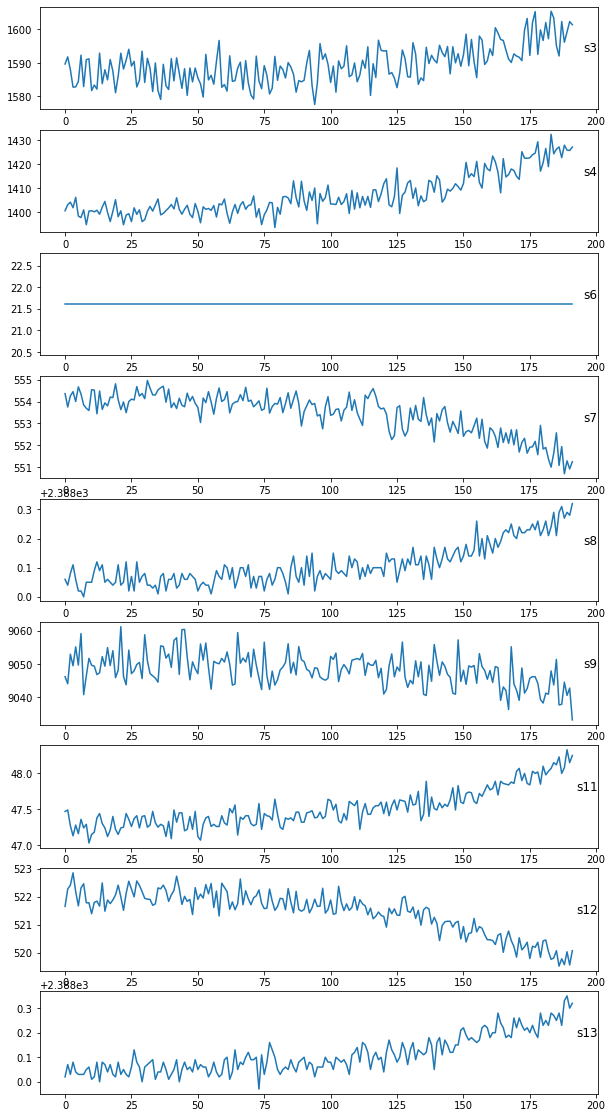

In [248]:
values = data_train[data_train.id==1].values
groups = [5, 6, 7, 8, 9, 10, 11,12,13]
i = 1
plt.figure(figsize=(10,20))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data_train.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

<AxesSubplot:>

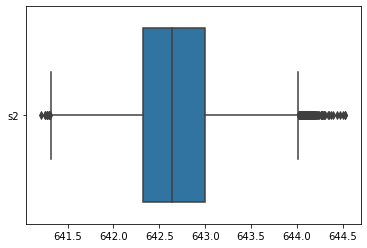

In [249]:
sns.boxplot( data = data_train, orient="h", order=['s2'])

In [250]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(data_train.s2)

,sub,values
0,IQR,0.675000
1,Upper Bound,644.012500
2,Lower Bound,641.312500
3,Sum outliers,128.000000
4,percentage outliers,0.620426


In [251]:
s = data_train['s2']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s2'] = data_train.s2.mask(data_train.s2 > upper_bound,data_train.s2.median())
data_train['s2'] = data_train.s2.mask(data_train.s2 < lower_bound,data_train.s2.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [252]:
s = data_train['s3']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s3'] = data_train.s3.mask(data_train.s3 > upper_bound,data_train.s3.median())
data_train['s3'] = data_train.s3.mask(data_train.s3 < lower_bound,data_train.s3.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [253]:

s = data_train['s4']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s4'] = data_train.s4.mask(data_train.s4 > upper_bound,data_train.s4.median())
data_train['s4'] = data_train.s4.mask(data_train.s4 < lower_bound,data_train.s4.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [254]:
s = data_train['s7']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s7'] = data_train.s7.mask(data_train.s7 > upper_bound,data_train.s7.median())
data_train['s7'] = data_train.s7.mask(data_train.s7 < lower_bound,data_train.s7.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [255]:
s = data_train['s8']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s8'] = data_train.s8.mask(data_train.s8 > upper_bound,data_train.s8.median())
data_train['s8'] = data_train.s8.mask(data_train.s8 < lower_bound,data_train.s8.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [256]:
s = data_train['s9']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s9'] = data_train.s9.mask(data_train.s9 > upper_bound,data_train.s9.median())
data_train['s9'] = data_train.s9.mask(data_train.s9 < lower_bound,data_train.s9.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [257]:
s = data_train['s11']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s11'] = data_train.s11.mask(data_train.s11 > upper_bound,data_train.s11.median())
data_train['s11'] = data_train.s11.mask(data_train.s11 < lower_bound,data_train.s11.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [258]:
s = data_train['s12']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s12'] = data_train.s12.mask(data_train.s12 > upper_bound,data_train.s12.median())
data_train['s12'] = data_train.s12.mask(data_train.s12 < lower_bound,data_train.s12.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [259]:

s = data_train['s13']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s13'] = data_train.s13.mask(data_train.s13 > upper_bound,data_train.s13.median())
data_train['s13'] = data_train.s13.mask(data_train.s13 < lower_bound,data_train.s13.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [260]:

s = data_train['s14']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s14'] = data_train.s14.mask(data_train.s14 > upper_bound,data_train.s14.median())
data_train['s14'] = data_train.s14.mask(data_train.s14 < lower_bound,data_train.s14.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [261]:
s = data_train['s15']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s15'] = data_train.s15.mask(data_train.s15 > upper_bound,data_train.s15.median())
data_train['s15'] = data_train.s15.mask(data_train.s15 < lower_bound,data_train.s15.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [262]:

s = data_train['s17']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s17'] = data_train.s17.mask(data_train.s17 > upper_bound,data_train.s17.median())
data_train['s17'] = data_train.s17.mask(data_train.s17 < lower_bound,data_train.s17.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [263]:
s = data_train['s20']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s20'] = data_train.s20.mask(data_train.s20 > upper_bound,data_train.s20.median())
data_train['s20'] = data_train.s20.mask(data_train.s20 < lower_bound,data_train.s20.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [264]:
s = data_train['s21']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s21'] = data_train.s21.mask(data_train.s21 > upper_bound,data_train.s21.median())
data_train['s21'] = data_train.s21.mask(data_train.s21 < lower_bound,data_train.s21.median())

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [265]:
data_train = pd.merge(data_train, data_train.groupby('id', as_index=False)['cycle'].max(), how='left', on='id')

In [266]:
data_train.rename(columns={"cycles_x": "cycle", "cycles_y": "maxcycles"}, inplace=True)

In [267]:
data_train['TTF'] = data_train['cycle_y'] - data_train['cycle_x']


In [268]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [269]:
ntrain = data_train.copy()

In [270]:
ntrain.iloc[:,2:19] = scaler.fit_transform(ntrain.iloc[:,2:19])

In [271]:

ntest = data_test.copy()

In [272]:
ntest.iloc[:,2:19] = scaler.transform(ntest.iloc[:,2:19])

In [273]:
def fractionTTF(dat,q):
    return(dat.TTF[q]-dat.TTF.min()) / float(dat.TTF.max()-dat.TTF.min())

In [274]:
fTTFz = []
fTTF = []

for i in range(data_train['id'].min(),data_train['id'].max()+1):
    dat=data_train[data_train.id==i]
    dat = dat.reset_index(drop=True)
    for q in range(len(dat)):
        fTTFz = fractionTTF(dat, q)
        fTTF.append(fTTFz)
ntrain['fTTF'] = fTTF

<AxesSubplot:>

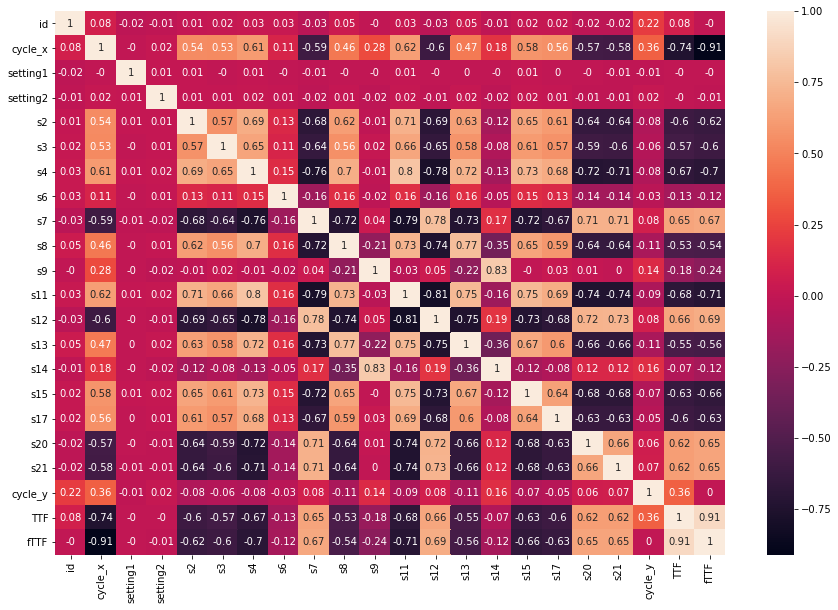

In [275]:

# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = ntrain.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, )

In [276]:
col_names_train = ['cycle_x','s2', 's3', 's4',   's7', 's8', 's9',
            's11', 's12', 's13',  's15',  's17',   's20', 's21']
col_names_test = ['cycle','s2', 's3', 's4',   's7', 's8', 's9',
            's11', 's12', 's13',  's15',  's17',   's20', 's21']

In [277]:

X_train = ntrain[col_names_train]
Y_train = ntrain['fTTF']
X_test = ntest[col_names_test]

In [278]:
model = Sequential()
model.add(Dense(6, input_dim=14, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, Y_train, nb_epoch=20)

C:\Users\Administrator\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/20
20631/20631 [==============================] - 1s 37us/step - loss: 0.0541
Epoch 2/20
20631/20631 [==============================] - 1s 25us/step - loss: 0.0072
Epoch 3/20
20631/20631 [==============================] - 1s 28us/step - loss: 0.0063
Epoch 4/20
20631/20631 [==============================] - 0s 24us/step - loss: 0.0061
Epoch 5/20
20631/20631 [==============================] - 1s 29us/step - loss: 0.0058
Epoch 6/20
20631/20631 [==============================] - 1s 25us/step - loss: 0.0058
Epoch 7/20
20631/20631 [==============================] - 1s 29us/step - loss: 0.0056
Epoch 8/20
20631/20631 [==============================] - 0s 24us/step - loss: 0.0055
Epoch 9/20
20631/20631 [==============================] - 1s 28us/step - loss: 0.0055
Epoch 10/20
20631/20631 [==============================] - 1s 29us/step - loss: 0.0054
Epoch 11/20
20631/20631 [==============================] - 1s 25us/step - loss: 0.0053
Epoch 12/20
20631/20631 [===========================

In [279]:
score = model.predict(X_test)

In [280]:
score[0:10]

array([[0.8236507 ],
       [0.7393111 ],
       [0.29523242],
       [0.36690286],
       [0.45362693],
       [0.4723785 ],
       [0.37606978],
       [0.2527756 ],
       [0.6990869 ],
       [0.3020685 ]], dtype=float32)

In [281]:
print(score.min(), score.max())

-0.0038383603 0.8236507


In [282]:
data_test = pd.merge(data_test, data_test.groupby('id', as_index=False)['cycle'].max(), how='left', on='id')

In [283]:
data_test.rename(columns={"cycles_x": "cycle", "cycle_y": "maxcycles"}, inplace=True)

In [284]:
data_test['score'] = score

In [285]:
data_test.head()

,id,cycle_x,setting1,setting2,s2,s3,s4,s6,s7,s8,...,s11,s12,s13,s14,s15,s17,s20,s21,maxcycles,score
0,1,31,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,...,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,31,0.823651
1,2,49,0.0018,-0.0001,642.55,1586.59,1410.83,21.61,553.52,2388.10,...,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,49,0.739311
2,3,126,-0.0016,0.0004,642.88,1589.75,1418.89,21.61,552.59,2388.16,...,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,126,0.295232
3,4,106,0.0012,0.0004,642.78,1594.53,1406.88,21.61,552.64,2388.13,...,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,106,0.366903
4,5,98,-0.0013,-0.0004,642.27,1589.94,1419.36,21.61,553.29,2388.10,...,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,98,0.453627


In [286]:
def totcycles(data):
    return(data['cycle_x'] / (1-data['score']))
    
data_test['maxpredcycles'] = totcycles(data_test)

In [287]:
data_test['maxpredcycles'].head()

0    175.787503
1    187.963507
2    178.782343
3    167.430854
4    179.364624
Name: maxpredcycles, dtype: float64

In [288]:

def RULfunction(data):
    return(data['maxpredcycles'] - data['maxcycles'])

data_test['RUL'] = RULfunction(data_test)

In [289]:

predictedRUL = data_test['RUL']
predictedRUL[0:10]

0    144.787503
1    138.963507
2     52.782343
3     61.430854
4     81.364624
5     94.006292
6     96.438935
7     56.155489
8    127.777024
9     83.098620
Name: RUL, dtype: float64

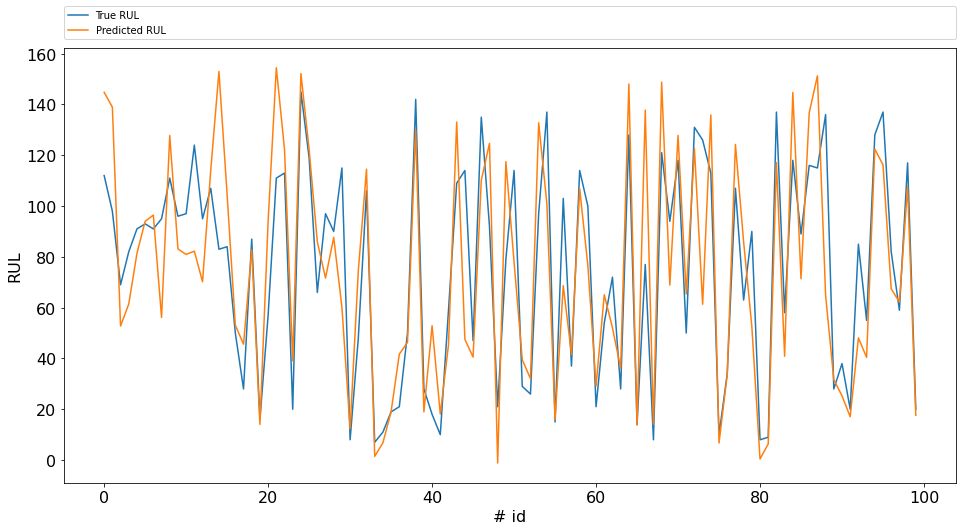

In [290]:

plt.figure(figsize = (16, 8))
plt.plot(RUL)
plt.plot(predictedRUL)
plt.xlabel('# id', fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('RUL', fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['True RUL','Predicted RUL'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.show()

In [291]:

xpredictedRUL = list(round(x) for x in predictedRUL)
opredictedRUL = []

for i in range(0,len(xpredictedRUL)):
    opredictedRUL = np.concatenate((opredictedRUL, list(reversed(np.arange(xpredictedRUL[i])))))

In [292]:
diff= xpredictedRUL - RUL
df2 = pd.DataFrame({'reality': RUL, 'predict': xpredictedRUL,'difference':diff})
df2.head(20)

,reality,predict,difference
0,112,145,33
1,98,139,41
2,69,53,-16
3,82,61,-21
4,91,81,-10
5,93,94,1
6,91,96,5
7,95,56,-39
8,111,128,17
9,96,83,-13


In [293]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(RUL, xpredictedRUL)
mse

638.29

In [294]:

print('MSE :', mean_squared_error(RUL,xpredictedRUL))
print('RMSE :', np.sqrt(mean_squared_error(RUL,xpredictedRUL)))

MSE : 638.29
RMSE : 25.26440183340979
